In [1]:
#code by Grady Robbins

In [13]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#load in data from txt file
lightcurve_data = np.loadtxt("student_043.txt")
lightcurve_sec = lightcurve_data[:,0]
lightcurve_brightness = lightcurve_data[:,1]
Mstar = 0.505 #in Solar Masses
Rstar = 0.490 #in Solar Radii
Mplanet = 0.102 #In Earth Masses

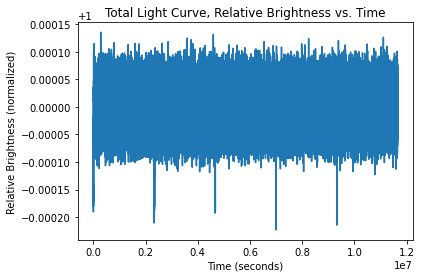

In [15]:
#project part 1, clear and labeled light curve plot:
plt.plot(lightcurve_sec,lightcurve_brightness)
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.title('Total Light Curve, Relative Brightness vs. Time')
#plt.savefig('full_curve_GR.png', dpi=300,bbox_inches='tight')
plt.show()

The first transit begins at t= 0 s, and ends at t~ 12844.474104 s.
The average depth value of this transit is 0.00011058767443072881 . This is subtracted from the mean non-transit value to calculate depth.
The standard deviation of this transit is 3.265669508897645e-05 .


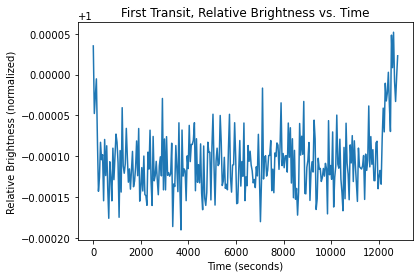

In [16]:
#project part 2:
#--------------Identifying starting variables and lists-------------
transit_start_time = [0] # first transit begins at t = 0 seconds
transit_start_brightness = [lightcurve_brightness[0]]
transit_start_indice = [0]
transit_end_time= []
transit_end_brightness = []
transit_end_indice = []
transit_mean_average = []
std = []
orbital_period = []
#--------------Finding first transit----------------
for n in range(len(lightcurve_brightness)): #calculate end transit time by matching beginning transit brightness with error
    if n>10: #removing first value
        if lightcurve_brightness[n] <= lightcurve_brightness[0]*1.00001 and lightcurve_brightness[n] >= lightcurve_brightness[0]*.99999:
            transit_end_time.append(lightcurve_sec[n])
            transit_end_indice.append(n)
            transit_end_brightness.append(lightcurve_brightness[n])
            break
#--------------Calculating variables, mean, std-------------------
no_transit_mean = lightcurve_brightness[transit_end_indice[0]:].mean(axis=0)
transit_mean = lightcurve_brightness[10:transit_end_indice[0]-10].mean(axis=0)
print('The first transit begins at t=',transit_start_time[0],'s, and ends at t~',transit_end_time[0],'s.')
print('The average depth value of this transit is',no_transit_mean-transit_mean,'. This is subtracted from the mean non-transit value to calculate depth.')#calculating mean
print('The standard deviation of this transit is',lightcurve_brightness[10:transit_end_indice[0]-10].std(axis=0),'.')#calculating standard deviation
#--------------Plot of first transit--------------------
plt.plot(lightcurve_sec[0:transit_end_indice[0]],lightcurve_brightness[0:transit_end_indice[0]])
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.title('First Transit, Relative Brightness vs. Time')
plt.savefig('First_Transit_GR.png',dpi=300,bbox_inches='tight')

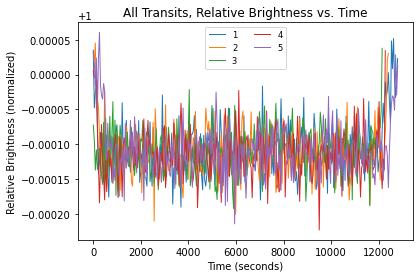

In [17]:
#Project Part 3
#------------------------for loop evaluating all transits------------------
k=-1
i=0
while i != 1:
    k +=1
    for n in range(len(lightcurve_brightness)):
        if n == len(lightcurve_brightness)-1: #stop loop when reaching end of data
            i=1
        if n > transit_end_indice[k]: #begin test only after previous transit ends
            if lightcurve_brightness[n] <= transit_mean*1.00001 and lightcurve_brightness[n] >= transit_mean*.99999:
                if lightcurve_brightness[n+2] <= transit_mean*1.00001 and lightcurve_brightness[n+2] >= transit_mean*.99999: #ensuring transit occurs within error
                    transit_start_time.append(lightcurve_sec[n])
                    transit_start_indice.append(n)
                    break
                    
    for n in range(len(lightcurve_brightness)): #calculate end transit time by matching beginning transit brightness with error
        if n == len(lightcurve_brightness)-1: #stop loop when reaching end of data
            i=1
        if n>transit_start_indice[k]+10: #begin test after previous transit begins
            if lightcurve_brightness[n] <= no_transit_mean*1.00001 and lightcurve_brightness[n] >= no_transit_mean*.99999: #test if transit ends within error
                transit_end_time.append(lightcurve_sec[n])
                transit_end_indice.append(n)
                break
#-----------------------------plotting------------------
plt.plot(lightcurve_sec[0:transit_end_indice[0]],lightcurve_brightness[0:transit_end_indice[0]], label = '1', linewidth = 1)
offset = 15
for n in range(1,5): # for loop to plot all 5 transits, subtract initial time and widen plot to view entire overplotted transits
    plt.plot((lightcurve_sec[transit_start_indice[2*n]-offset:transit_end_indice[2*n]] - lightcurve_sec[transit_start_indice[2*n]-offset]),lightcurve_brightness[transit_start_indice[2*n]-offset:transit_end_indice[2*n]], label = str(n+1), linewidth = 1)
    transit_mean_average.append(lightcurve_brightness[transit_start_indice[2*n]+10:transit_end_indice[2*n]-10].mean(axis=0)) #Average Transit
    std.append(lightcurve_brightness[transit_start_indice[2*n]+10:transit_end_indice[2*n]-10].std(axis=0)) #Average standard deviation
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.legend(loc=9,ncol=2,fontsize='small')
plt.title('All Transits, Relative Brightness vs. Time')
plt.savefig('All_Transits_GR.png',dpi=300,bbox_inches='tight')

In [18]:
#Project Part 3 Continued
for n in range(4):
    orbital_period.append(lightcurve_sec[transit_start_indice[2*n+2]] -lightcurve_sec[transit_start_indice[2*n]]) #Calculating orbital period
print('The orbital period of this planet is',np.mean(orbital_period)/3600/24,'days')
Flux = 1-np.mean(transit_mean_average) # Average Flux
print('The total averaged depth of this planet is',Flux)
print('The average standard deviation of all transits is',np.mean(std))
Rplanet = (Flux**(0.5))*Rstar #Transit Flux equation, In Solar Radii
Rplanet_Earth = Rplanet*109.076 #In Earth Radii
print('The radius of this planet is',Rplanet_Earth,'Earth radii')

The orbital period of this planet is 26.97766967679398 days
The total averaged depth of this planet is 0.00011313695884507258
The average standard deviation of all transits is 2.9981382927988123e-05
The radius of this planet is 0.5684961574609203 Earth radii
